In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
query = sqlalchemy.select([Measurement.tobs]).where(func.substr(Measurement.date, 7, 1) == str(6))
june_temps = session.execute(query).fetchall()

In [5]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp[0] for temp in june_temps]

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['June Temps'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
query = sqlalchemy.select([Measurement.tobs]).where(func.substr(Measurement.date, 6, 2) == str(12))
dec_temps = session.execute(query).fetchall()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp[0] for temp in dec_temps]

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['December Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:>

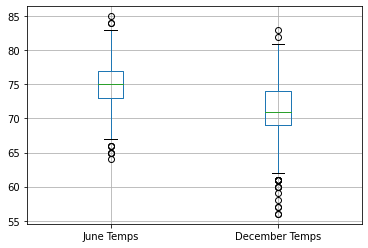

In [12]:
pd.concat([june_temps_df, dec_temps_df], axis=1).boxplot()